# Twitter 1.6 million tweets Sentiment Analysis

The Sentiment140 dataset is an excellent resource for those interested in performing sentiment analysis of Twitter data. It contains 1.6 million tweets pre-classified as either positive or negative. This dataset is well suited to machine learning approaches as it contains a large number of easily accessible features, such as tweet text, user profile information, and sentiment. The challenge associated with this dataset is that the tweets can be full of slang, abbreviations, and other language features that are difficult for machines to interpret.


Each tweet in the dataset has several features, including the following:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)


We will use supervised and unsupervised learning methods to evaluate this dataset based on various machine learning theories. In particular, we will explore how well these models can predict the sentiment label of each tweet based on its text. We will also examine various NLP techniques that can be used to preprocess the text data and improve the performance of our models.

Overall, this dataset provides an excellent opportunity to explore the application of NLP methods to real-world data. By analyzing this data, we can gain insights into how people express sentiment on social media and develop models that can accurately classify the sentiment of new tweets.



In [1]:
# Import the Necessary Dependencies

# Data Manipulation
import re ## regular expression operator
import numpy as np
import pandas as pd
import string 


# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px



# Methods and stopwords text processing
import nltk ## natural language toolkit
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from collections import Counter



# Machine Learning Libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, pipeline, decomposition, feature_extraction,linear_model, model_selection, preprocessing 
from sklearn.linear_model import RidgeClassifier 
from sklearn.naive_bayes import GaussianNB




import keras 
from keras.models import Sequential, Model 
from keras import layers
from keras.layers import Dense, Dropout, Input, Embedding



In [2]:
# Importing the dataset and defining column names
DATASET_COLUMNS=['target','ids','date','flag','user','text']

# Defining the dataset encoding
DATASET_ENCODING = "ISO-8859-1"

# Reading the CSV file into a pandas DataFrame
df_raw = pd.read_csv('twitter_data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

# Printing the first five rows of the DataFrame to explore the data
df_raw.head()

# Keeping only the 'target' and 'text' columns in the DataFrame
df_raw = df_raw[['target','text']]

# Replacing the value 4 with 1 in the 'target' column of the DataFrame to ease understanding
df_raw['target'] = df_raw['target'].replace(4,1)

# Creating lists for the 'text' and 'target' columns
text, target = list(df_raw['text']), list(df_raw['target'])

In [3]:
print('length of data is', len(df_raw))


length of data is 1600000


In [4]:

# Create subgroups based on the target column
subgroups = df_raw['target'].astype(str)  # Convert the 'target' column to a string to ensure correct stratification

# Specify the number of tweets you want to include in your final dataset for each subgroup
n_samples = 20000  # Replace with the desired number of tweets in each subgroup

# Use train_test_split to do stratified sampling
target0_df, _ = train_test_split(df_raw[subgroups == '0'], stratify=subgroups[subgroups == '0'], train_size=n_samples/len(df_raw[subgroups == '0']), random_state=42)
target1_df, _ = train_test_split(df_raw[subgroups == '1'], stratify=subgroups[subgroups == '1'], train_size=n_samples/len(df_raw[subgroups == '1']), random_state=42)

# Combine the two subgroups into a single dataframe
df = pd.concat([target0_df, target1_df], ignore_index=True)

# Save the sampled dataset
df.to_csv('sampled_twitter_data.csv', index=False)

In [5]:
# Print the lenght of the dataset
print('The new length of data is', len(df))


The new length of data is 40000


In [6]:
# Display the concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  40000 non-null  int64 
 1   text    40000 non-null  object
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [7]:
# Checking the data type of each column in the DataFrame
df.dtypes

target     int64
text      object
dtype: object

In [8]:
# Checking for null values
np.sum(df.isnull().any(axis=1))

0

In [9]:
# Rows and columns in the dataset
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   2
Count of rows in the data is:   40000


In [10]:
# Check unique target values
df['target'].unique()

array([0, 1], dtype=int64)

In [11]:
# Check the number of target values
df['target'].nunique()

2

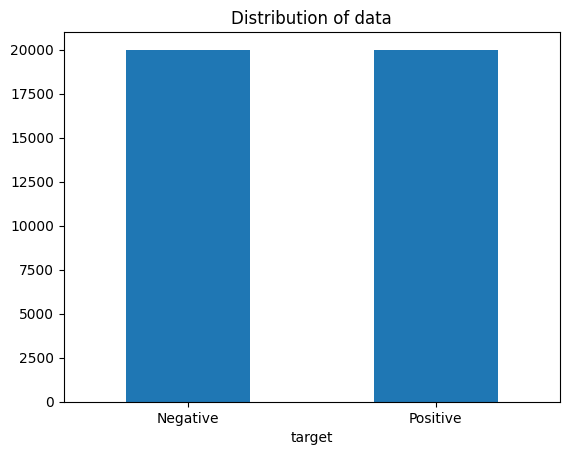

In [12]:
# Data Visualization of Target Variables

# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, target = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

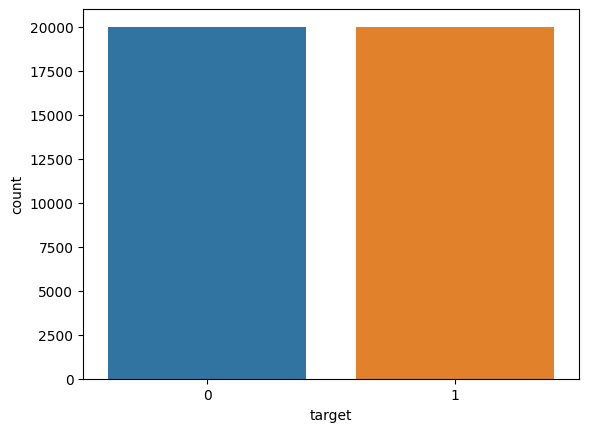

In [13]:
# Frequency of each unique value in the "target" column of the dataframe 
sns.countplot(x='target', data=df)

In [14]:
# Checking the first rows of text column
df['text'].head()

0                    @streetkingpin  wish I was there!
1                                   I don't feel good 
2    my mom was just asking if i could work w/her o...
3    Just arrived home and kaki gw pegeeeellll  htt...
4    @saudarilee It was a pleasure &quot;babysittin...
Name: text, dtype: object

In [15]:
# Checking the last rows of text column
df['text'].tail()

39995    @Dan_Jones there is always something to be pay...
39996    a cool day on the bay today, light winds and a...
39997    Voting is over, Conservatives strongest, Socia...
39998    Justback from Jason's house.  Very nice lots o...
39999    is chatting on facey with @JuliaBier and Matt ...
Name: text, dtype: object

In [16]:
#Create a list of all the words in text column
corpus = []

word = df['text'].str.split()
new = word.values.tolist()
corpus=[word for i in new for word in i]

In [17]:
#Downloading the stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thamires\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 14 artists>

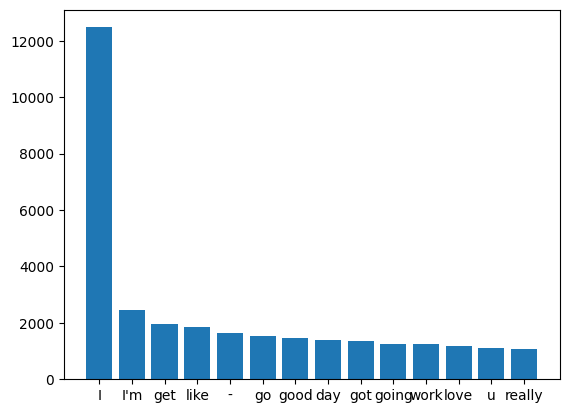

In [18]:
# Generating a bar chart of the most commonly occurring words in the corpus
from collections import Counter

counter=Counter(corpus)
most=counter.most_common(100)

x, y= [], []
for word,count in most[:50]:
    # can avoid stop words too
    if word not in stop_words:
        x.append(word)
        y.append(count)
        
plt.bar(x,y)

# It first imports the Counter module from the collections library to count the frequency of each word in the corpus.
# It then selects the 100 most commonly occurring words using the most_common() function of the Counter object.
# It creates empty lists x and y to store the word and its frequency respectively for the 15 most common words.
# It then iterates over the first 15 items in the most_common() list, and for each item, it appends the word to the x list and its frequency to the y list, but only if the word is not a stop word.
# Finally, it plots the bar chart using plt.bar(x,y) from the matplotlib library.

In [19]:
# Ploting the tree of Most Common Tweeted words

temp = pd.DataFrame(most)


fig = px.treemap(temp, path=[0], values=1,title='Tree of Most Common Tweeted words')
fig.show()

<Axes: >

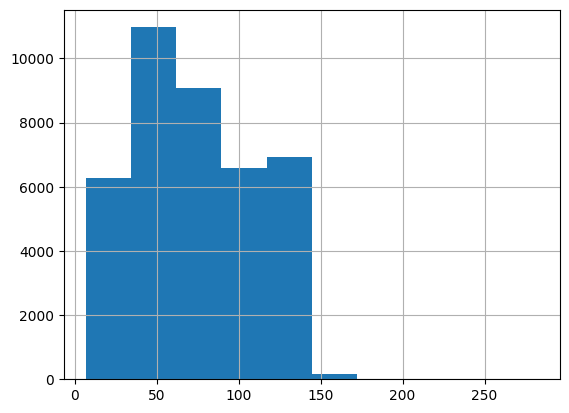

In [20]:
# Plot lenght of tweets
df['text'].str.len().hist()


In [21]:
# Range size of the text
min(df['text'].str.len()), max(df['text'].str.len())


(7, 282)

<Axes: >

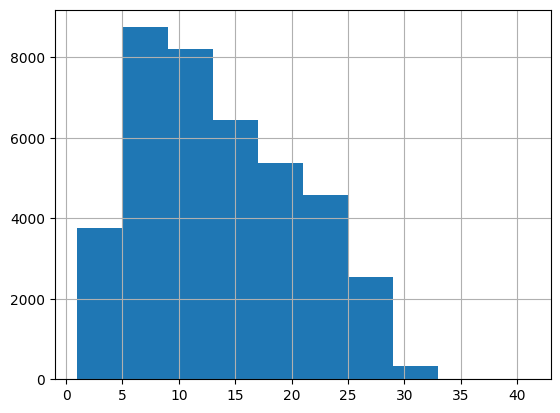

In [22]:
# Plot the length of the words
df['text'].str.split().map(lambda x: len(x)).hist()


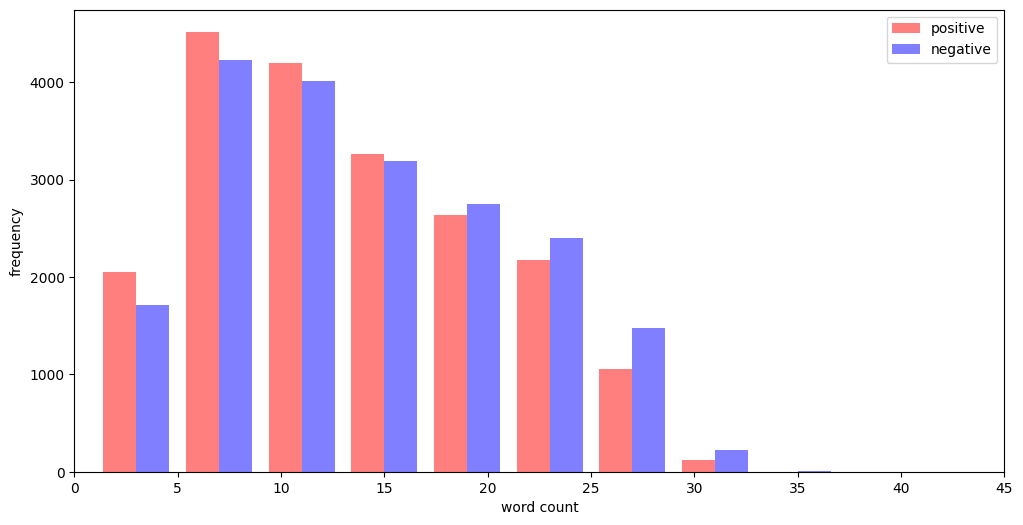

In [26]:
# create 'word count' column in df
df['word count'] = df['text'].apply(lambda x: len(str(x).split()))

# word count distribution for both positive and negative sentiments
x = df['word count'][df.target == 1]
y = df['word count'][df.target == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['r','b'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [27]:
# Range size of the words
min(df['text'].str.split().map(lambda x: len(x))), max(df['text'].str.split().map(lambda x: len(x)))


(1, 41)

In [28]:
# N-gram exploration
from nltk.util import ngrams

import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

## visualising top n-grams

def get_top_word_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_word_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

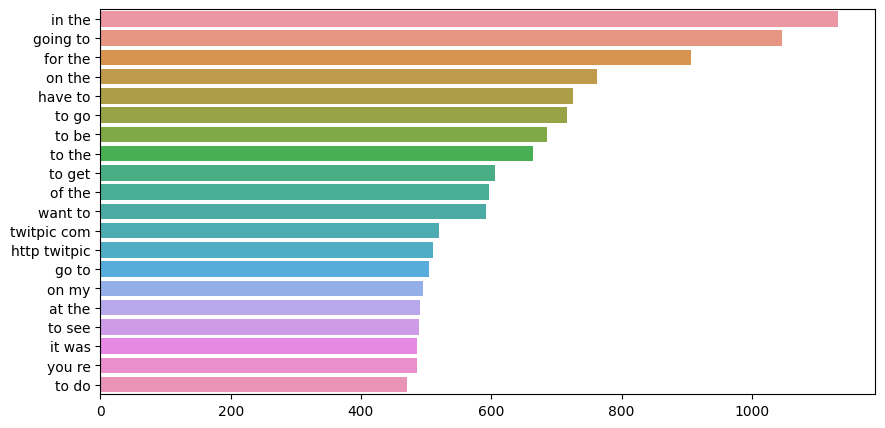

In [29]:
# Plot N-grams
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_word_bigrams(df['text'])[:20]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

# Proprocessing Data

In [30]:
# Convert all text to lowercase
df['text'] = df['text'].str.lower()
df['text'].tail()

39995    @dan_jones there is always something to be pay...
39996    a cool day on the bay today, light winds and a...
39997    voting is over, conservatives strongest, socia...
39998    justback from jason's house.  very nice lots o...
39999    is chatting on facey with @juliabier and matt ...
Name: text, dtype: object

In [31]:
#Cleaning and removing punctuations

english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].tail()

39995    danjones there is always something to be pay f...
39996    a cool day on the bay today light winds and a ...
39997    voting is over conservatives strongest sociali...
39998    justback from jasons house  very nice lots of ...
39999    is chatting on facey with juliabier and matt a...
Name: text, dtype: object

In [32]:
#Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'].tail()

39995    danjones there is always something to be pay f...
39996    a cool day on the bay today light winds and a ...
39997    voting is over conservatives strongest sociali...
39998    justback from jasons house  very nice lots of ...
39999    is chatting on facey with juliabier and matt a...
Name: text, dtype: object

In [33]:
#Cleaning and removing URLs

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].tail()

39995    danjones there is always something to be pay f...
39996    a cool day on the bay today light winds and a ...
39997    voting is over conservatives strongest sociali...
39998    justback from jasons house  very nice lots of ...
39999    is chatting on facey with juliabier and matt a...
Name: text, dtype: object

In [34]:
#Cleaning and removing numeric numbers

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].tail()

39995    danjones there is always something to be pay f...
39996    a cool day on the bay today light winds and a ...
39997    voting is over conservatives strongest sociali...
39998    justback from jasons house  very nice lots of ...
39999    is chatting on facey with juliabier and matt a...
Name: text, dtype: object

In [35]:
# Removing # and @ characters from tweets and other symbols

def cleaning_characters(data):
    return re.sub(r'\@\w+|\#|\'|\"|\´|\`|\,','', data)
df['text'] = df['text'].apply(lambda x: cleaning_characters(x))
df['text'].tail()


39995    danjones there is always something to be pay f...
39996    a cool day on the bay today light winds and a ...
39997    voting is over conservatives strongest sociali...
39998    justback from jasons house  very nice lots of ...
39999    is chatting on facey with juliabier and matt a...
Name: text, dtype: object

In [36]:
# #Defining set containing all stopwords in English.

# nltk.download ('stopwords')
# stop_words = set(stopwords.words( 'english'))

In [37]:
#Cleaning and removing the stop words list from the tweet text

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].tail()


39995    danjones always something pay good news though...
39996    cool day bay today light winds showers time pu...
39997    voting conservatives strongest socialists weak...
39998                 justback jasons house nice lots work
39999                  chatting facey juliabier matt maine
Name: text, dtype: object

In [38]:
# Count the words used per user

def word_count(sentence):
    return len(sentence.split())
    
df['word count'] = df['text'].apply(word_count)
df.tail()

,target,text,word count
39995,1,danjones always something pay good news though...,16
39996,1,cool day bay today light winds showers time pu...,16
39997,1,voting conservatives strongest socialists weak...,14
39998,1,justback jasons house nice lots work,6
39999,1,chatting facey juliabier matt maine,5


In [39]:
# Stemming process

st = nltk.PorterStemmer()
def stemming_process(data):
    text = [st.stem(word) for word in data]
    return data
df['text']= df['text'].apply(lambda x: stemming_process(x))
df['text'].tail()



39995    danjones always something pay good news though...
39996    cool day bay today light winds showers time pu...
39997    voting conservatives strongest socialists weak...
39998                 justback jasons house nice lots work
39999                  chatting facey juliabier matt maine
Name: text, dtype: object

In [40]:
# Lemmatizer Proccess

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))
df['text'].tail()

39995    danjones always something pay good news though...
39996    cool day bay today light winds showers time pu...
39997    voting conservatives strongest socialists weak...
39998                 justback jasons house nice lots work
39999                  chatting facey juliabier matt maine
Name: text, dtype: object

In [41]:
# Separating positive and negative tweets

data_pos = df[df['target'] == 1]
data_neg = df[df['target'] == 0]
df = pd.concat([data_neg, data_pos])
data_neg.tail()

# Save the sampled dataset
df.to_csv('sampled_twitter_data.csv', index=False)


In [42]:
data_pos.tail()

,target,text,word count
39995,1,danjones always something pay good news though...,16
39996,1,cool day bay today light winds showers time pu...,16
39997,1,voting conservatives strongest socialists weak...,14
39998,1,justback jasons house nice lots work,6
39999,1,chatting facey juliabier matt maine,5


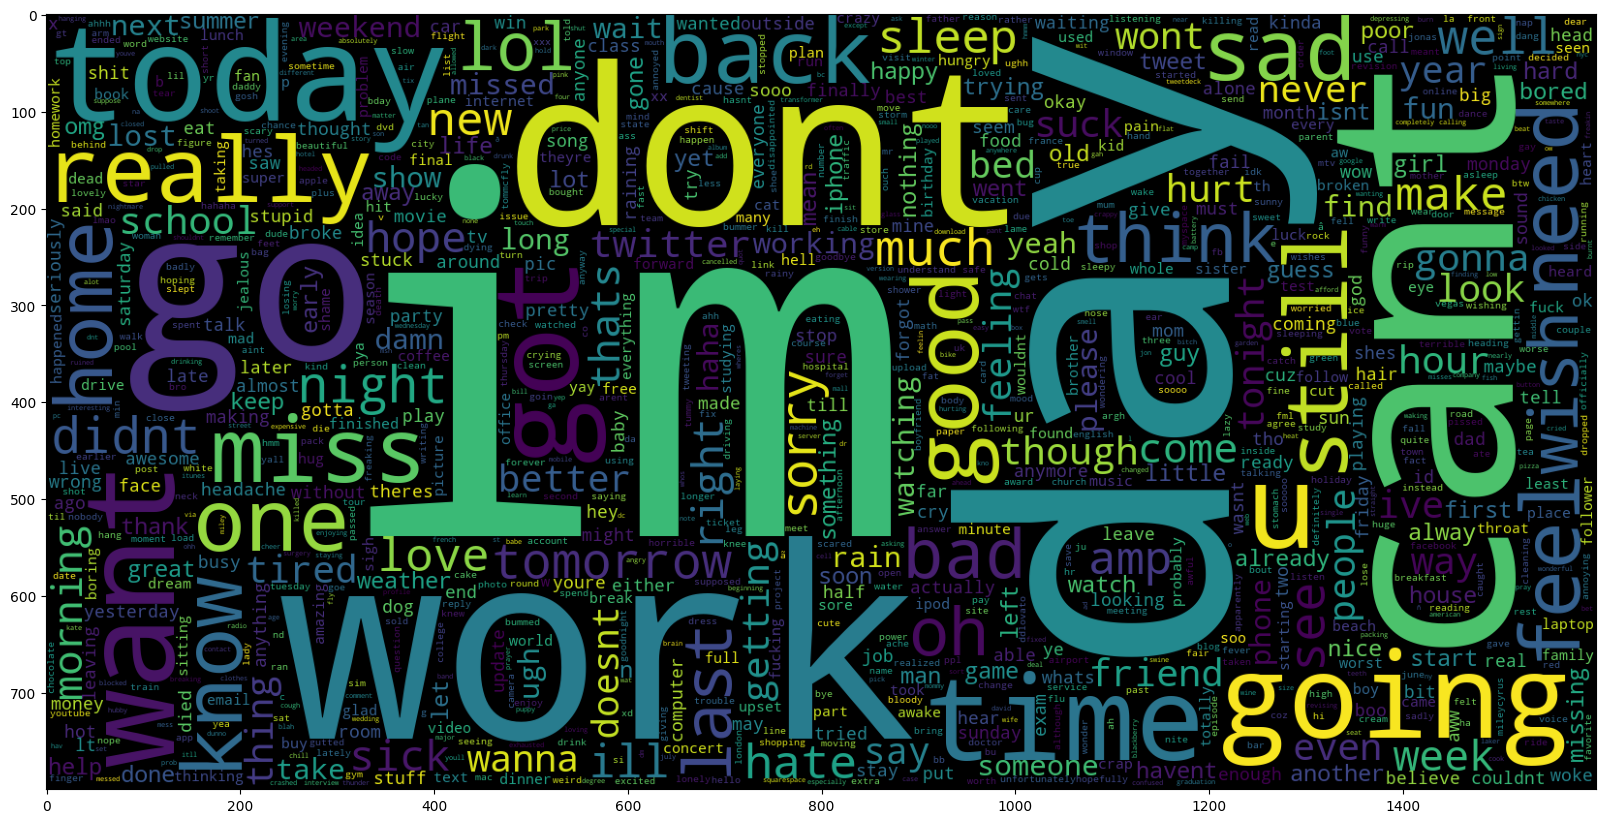

In [43]:
# Plot words of negative tweets

data_neg1 = df['text'][:20000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(map(str,data_neg1)))
plt.imshow(wc)

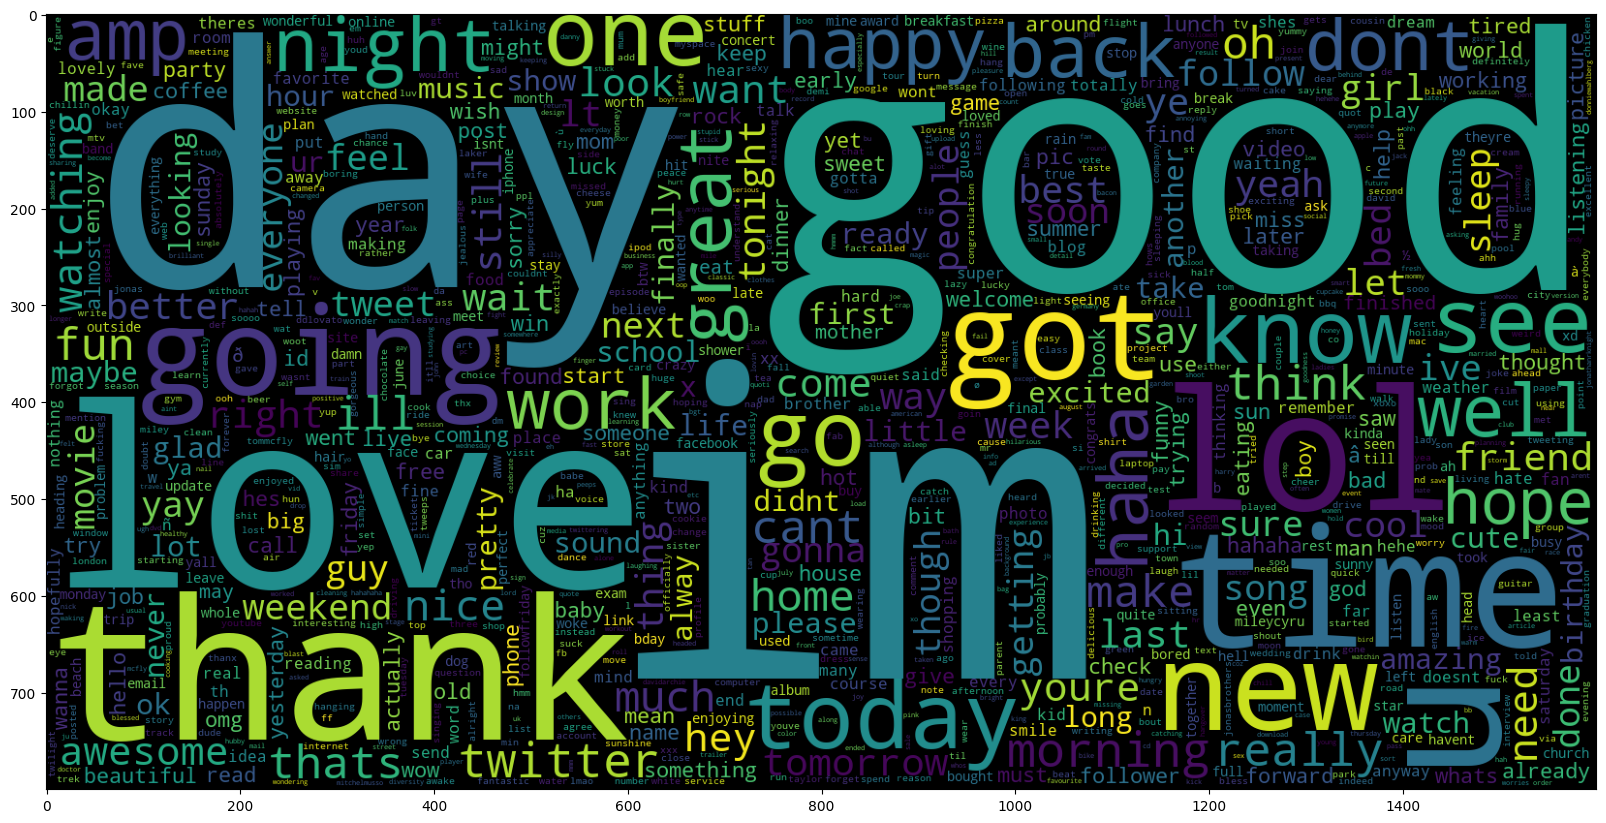

In [44]:
# Plot tweets of positive tweets

data_pos1 = df['text'][20000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(map(str, data_pos1)))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [45]:
# Doing tokenization of Tweet Text

tokenizer = RegexpTokenizer(r'\w+')
df_tk = df['text'].apply(tokenizer.tokenize)
df_tk.tail()

39995    [danjones, always, something, pay, good, news,...
39996    [cool, day, bay, today, light, winds, showers,...
39997    [voting, conservatives, strongest, socialists,...
39998          [justback, jasons, house, nice, lots, work]
39999            [chatting, facey, juliabier, matt, maine]
Name: text, dtype: object

In [46]:
# Separate the date into train and test subset

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'],
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

# X = df.drop('target', axis=1)  # Predictor feature columns
# y = df['target']   # Predicted class (1=True, 0=False)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0) 
# 0.05 is the proportion of the data to allocate to the test set 
#the random seed used to split the data. This ensures that the same random split is used every time the code is run.

X_train.tail()

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)



Data Split done.


In [47]:
print(('X_train shape =', X_train.shape), ('y_train shape =', y_train.shape), ('X_test shape =', X_test.shape), ('y_test shape =', y_test.shape))

('X_train shape =', (38000,)) ('y_train shape =', (38000,)) ('X_test shape =', (2000,)) ('y_test shape =', (2000,))


## code explanation

This code is trying to balance the number of samples in the two classes (majority and minority) in a dataset. The dataset has features (X_train) and targets (y_train), where y_train=0 represents the majority class and y_train=4 represents the minority class.

To balance the dataset, the code first separates the majority and minority classes based on their target values. The majority class features are stored in a variable called X_majority, and the minority class features are stored in a variable called X_minority.

Next, the majority class is undersampled by selecting the same number of samples as there are in the minority class. This is done using the resample() function with the following parameters: X_majority (features of majority class), replace=False (no replacement), n_samples=len(X_minority) (selecting the same number of samples as minority class), and random_state=42 (for reproducibility).

Finally, the downsampled majority class and the minority class are combined to create a balanced training dataset. This is done by concatenating the downsampled majority class and minority class features and targets using the numpy concatenate() function. The target values for the downsampled majority class are set to 0 (majority class) using np.zeros() function, and the target values for the minority class are set to 4 (minority class) using np.ones() function. The balanced features and targets are stored in X_train_balanced and y_train_balanced variables, respectively.

You can set any integer value for random_state. The choice of the specific number, in this case, 42, is arbitrary.

The number 42 is sometimes used in computer science and related fields as a "random" number. It is a reference to the book "The Hitchhiker's Guide to the Galaxy" by Douglas Adams, in which the number 42 is famously described as the "Answer to the Ultimate Question of Life, the Universe, and Everything."

In reality, there is nothing special about the number 42, and any other integer value can be used instead. The important thing is to use a fixed value for random_state in order to achieve reproducibility.

# TF-IDF Vectoriser

TF-IDF indicates what the importance of the word is in order to understand the document or dataset. Let us understand with an example. Suppose you have a dataset where students write an essay on the topic, My House. In this dataset, the word a appears many times; it’s a high frequency word compared to other words in the dataset. The dataset contains other words like home, house, rooms and so on that appear less often, so their frequency are lower and they carry more information compared to the word. This is the intuition behind TF-IDF.

TF-IDF Vectoriser converts a collection of raw documents to a matrix of TF-IDF features. The Vectoriser is usually trained on only the X_train dataset.

ngram_range is the range of number of words in a sequence. [e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2)]

max_features specifies the number of features to consider. [Ordered by feature frequency across the corpus].

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# # vectorize the text data
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
print('Vectorizer fitted.')
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

# # transform the text data into a sparse matrix
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)



Vectorizer fitted.
No. of feature_words:  248833


# Word Embeddings - Word2vec Model

Word embeddings are a powerful tool in natural language processing (NLP) that enable the conversion of words into vectors of real numbers, which can be used to train machine learning models. **Word2vec** is a widely used algorithm for generating word embeddings, which is capable of capturing semantic relationships between words.

In our NLP project using the Twitter 1.2 million tweets dataset, we can use the **Word2vec** model to represent words in the tweets as vectors of real numbers, which can then be used to train machine learning models to classify the tweets according to sentiment or topic.

The **Word2vec** algorithm works by training a neural network on a large corpus of text data, such as the Twitter dataset. The input to the neural network is a sequence of words, and the output is a set of real-valued vectors that represent the words. The algorithm is designed to learn the meaning of words by predicting the context in which they appear in the corpus.

There are two variants of the **Word2vec** algorithm: continuous _bag of words (CBOW)_ and _skip-gram_. In _CBOW_, the algorithm tries to predict a target word based on its context words. In _skip-gram_, the algorithm tries to predict context words given a target word. _Skip-gram_ is often preferred over _CBOW_ because it tends to perform better with larger datasets.

In [92]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

class myWord2Vec:
    def __init__(self, corpus, vector_size, window, min_count, n_proc, epochs):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.n_proc = n_proc
        self.epochs = epochs
        self.model = self.get_w2v_vectorizer(corpus)
        
    def tokenize(self,df):
        corpus = []
        j = 0
        for col in df:
            word_list = col.split(" ")
            word_list = ' '.join(word_list).split()
            tagged = TaggedDocument(word_list, [j])
            j = j+1
            corpus.append(tagged)
        return corpus

    def get_w2v_vectorizer(self, corpus):
        corpus = self.tokenize(corpus)
        model = Doc2Vec(vector_size=self.vector_size,
                        window=self.window,
                        min_count=self.min_count,
                        workers=self.n_proc,
                        epochs = self.epochs)
        model.build_vocab(corpus)
        model.train(corpus, total_examples=model.corpus_count
                , epochs=model.epochs)
        return model

    def text_w2v_vectorize(self, text):
        vectorized = self.model.infer_vector(text.split(' '))
        return vectorized

    def df_w2v_vectorize(self, df):
        card2vec = [self.text_w2v_vectorize(df.iloc[i])
                for i in range(0,len(df))]
        return card2vec



# Create Word2Vec embeddings using myWord2Vec class
w2v = myWord2Vec(X_train, vector_size=50, window=2, min_count=5, n_proc=4, epochs=10)
X_train_w2v = w2v.df_w2v_vectorize(X_train)
X_test_w2v = w2v.df_w2v_vectorize(X_test)


To implement **Word2vec** in our project, we can use the gensim library in Python. The _myWord2Vec_ class in the code above uses gensim to train a **Word2vec** model on the Twitter dataset. The tokenize method of the class tokenizes the tweets and creates a _TaggedDocument_ object for each tweet, which contains a list of words and a unique identifier. The _get_w2v_vectorizer_ method then trains the **Word2vec** model on the _TaggedDocument_ objects using the parameters specified in the class constructor. Finally, the _text_w2v_vectorize_ and _df_w2v_vectorize_ methods are used to convert tweets or dataframes of tweets into vectors using the trained **Word2vec** model.

Once the tweets have been represented as vectors using **Word2vec**, they can be used to train machine learning models to classify the tweets according to sentiment or topic. For example, we could use a support vector machine (SVM) to classify tweets as positive or negative based on their **Word2vec** vectors.

One of the advantages of **Word2vec** is that it is able to capture semantic relationships between words. For example, the **Word2vec** vectors for "king" and "queen" are likely to be similar, since they are both royalty. Similarly, the **Word2vec** vectors for "car" and "truck" are likely to be similar, since they are both vehicles. This property of **Word2vec** makes it useful in a variety of NLP tasks, such as sentiment analysis, topic modeling, and machine translation.

In summary, **Word2vec** is a powerful algorithm for generating word embeddings that can be used to train machine learning models for NLP tasks. In our project using the Twitter 1.2 million tweets dataset, **Word2vec** can be used to represent tweets as vectors of real numbers, which can then be used to train machine learning models to classify the tweets according to sentiment or topic.

# Supervised Learning

Supervised learning is a type of machine learning that involves training a model on a labeled dataset in order to make predictions on new, unseen data. In the context of an NLP project focused on the Twitter 1.2 million tweets dataset, supervised learning would involve training a model to classify tweets as either positive or negative sentiment based on a labeled dataset of tweets.

In this scenario, the labeled dataset would consist of tweets that have been manually annotated as either positive or negative sentiment. The goal of the supervised learning model would be to learn patterns in the text data that are associated with positive or negative sentiment, so that it can accurately classify new, unseen tweets as either positive or negative.

The first step in building a supervised learning model for sentiment analysis would be to preprocess the text data as we already did.  This is related to the tasks such as tokenization, removing stop words, stemming and lemmatization, and converting the text data into a numerical format that can be used as input for the model. One common approach for this is to use the bag-of-words representation or a more advanced technique like word embeddings.

After preprocessing the text data, the next step as we already did would be to split the labeled dataset into a training set and a testing set. The training set would be used to train the supervised learning model, while the testing set would be used to evaluate the performance of the model on unseen data.

Once the dataset is split, a supervised learning algorithm can be trained on the training set. The model will then be evaluated on the testing set, using evaluation metrics such as accuracy, precision, recall, and F1 score.

If the model's performance is not satisfactory, various techniques such as hyperparameter tuning or using more complex models like deep learning can be employed to improve its performance. The final step is to use the trained model to predict sentiment on new, unseen tweets.

Overall, supervised learning is a powerful tool for NLP tasks such as sentiment analysis, as it allows us to leverage labeled data to train models that can make accurate predictions on new, unseen data.

In [93]:
# Evaluate Model Function 1

def model_EvaluateB(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test_vec)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [94]:
# Evaluate Model Function 2

def model_EvaluateO(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test_vec)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Oranges',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

The function above takes a trained model as input and applies it to the test dataset to generate predicted values. It then prints out the evaluation metrics using the _classification_report()_ function from scikit-learn's metrics module.

The classification report includes **precision**, **recall**, **f1-score**, and **support metrics** for each class (positive and negative) and the overall accuracy of the model. 

- **Precision** is the number of true positives divided by the sum of true and false positives. 
- **Recall** is the number of true positives divided by the sum of true positives and false negatives. 
- **F1-score** is the harmonic mean of precision and recall. 
- **Support** is the number of samples of the true response that lie in that class.

## Bernoulli Naive Bayes 

Bernoulli Naive Bayes is a popular classification algorithm that is widely used in natural language processing (NLP) applications. It is a variant of the Naive Bayes algorithm, which is based on the Bayes theorem. In this algorithm, we assume that each feature is binary and the occurrence of each feature is independent of the occurrence of other features. This assumption is known as the "naive" assumption and hence the algorithm is called Naive Bayes.

In the context of NLP, Bernoulli Naive Bayes is used for text classification tasks such as sentiment analysis, spam detection, and topic classification. The algorithm works by building a probabilistic model based on the occurrence of words in the training dataset.

In the case of the Twitter 1.2 million tweets dataset, the Bernoulli Naive Bayes model can be used to classify tweets into categories such as positive, negative, or neutral sentiment. To build the model, we first need to preprocess the data by removing stop words, punctuation marks, and converting all the words to lowercase.

Once the data is preprocessed, we can build the model using the following steps:

1. **Creating the vocabulary:** We create a list of all the unique words in the training dataset. This list is known as the vocabulary.

2. **Creating the document-term matrix:** We create a document-term matrix, which is a matrix that represents the frequency of each word in each document. In the case of NLP, a document is a tweet, and a term is a word.

4. **Calculating the probabilities:** We calculate the probabilities of each word in each class (positive, negative, or neutral sentiment). This is done by counting the number of times each word appears in each class and dividing it by the total number of words in that class.

5. **Calculating the class priors:** We calculate the prior probabilities of each class (positive, negative, or neutral sentiment). This is done by counting the number of tweets in each class and dividing it by the total number of tweets.

6. **Classifying new tweets:** Once the model is trained, we can use it to classify new tweets by calculating the probability of each class given the words in the tweet using Bayes' theorem. The class with the highest probability is chosen as the predicted class for the tweet.

The Bernoulli Naive Bayes algorithm is particularly useful for NLP tasks because it can handle high-dimensional feature spaces (i.e., large vocabularies) efficiently. Additionally, it is relatively easy to implement and can achieve good results with small training datasets. However, it is important to note that the "naive" assumption may not hold true in all cases, and more complex models may be needed for more accurate results.

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       983
           1       0.77      0.74      0.76      1017

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



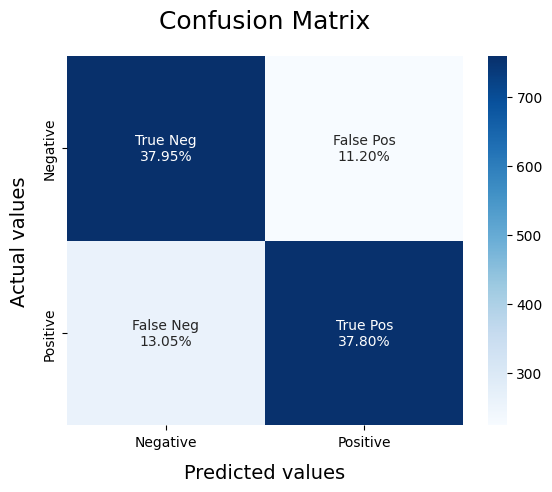

In [95]:
# Applying the BNB model with TF-IDF Vectoriser

BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train_vec, y_train)
model_EvaluateB(BNBmodel)

The result of applying the Bernoulli Naive Bayes model with TF-IDF Vectoriser on the Twitter dataset showed an **accuracy** of **76%**. This means that the model was able to correctly predict the sentiment of 76% of the tweets in the test set. The precision and recall for each class were 74-77%, indicating that the model was able to predict both positive and negative sentiments with similar accuracy. The F1-score for both classes was also 76%, indicating that the model has a balanced performance for both positive and negative sentiments. In summary, the Bernoulli Naive Bayes model performed well in predicting the sentiment of tweets in the test set.

In [96]:
# Applying the BNB model with Word2vec
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train_w2v, y_train)

# Evaluate the performance of the classifier on the testing set
y_pred = BNBmodel.predict(X_test_w2v)
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Accuracy:', accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62       983
           1       0.63      0.63      0.63      1017

    accuracy                           0.63      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.63      0.63      0.63      2000

Accuracy: 0.626


The **accuracy** of the BNB model on the testing set is also reported as **0.627**, which represents the percentage of correctly classified tweets among all the tweets in the dataset.

Overall, the BNB model with Word2vec achieved an accuracy of 0.627, which means it was able to classify tweets with a moderate level of accuracy.

### Considerations of the model

Based on the given metrics, the Bernoulli Naive Bayes model with TF-IDF Vectoriser has a better performance compared to the model with Word2vec.



## LinearSVC 

LinearSVC (Linear Support Vector Classification) is a popular machine learning model used for classification tasks. It is a type of Support Vector Machine (SVM) model, which is a supervised learning algorithm that can be used for both classification and regression tasks. LinearSVC is specifically designed for linearly separable data, where the decision boundary between the classes is a straight line.

In the context of NLP, LinearSVC can be used for tasks such as sentiment analysis, text classification, and topic modeling. In order to use LinearSVC for these tasks, we need to first preprocess the text data. This typically involves steps such as tokenization, stopword removal, stemming or lemmatization, and vectorization like we already did.

Once the data is preprocessed and vectorized, we can then train the LinearSVC model. The model learns a linear decision boundary between the classes in the feature space, which in the case of NLP, is the space of word frequencies. During training, the model adjusts the weights assigned to each feature (i.e., each word in the vocabulary) in order to find the best separating hyperplane between the classes.

When making predictions on new text data, the LinearSVC model takes the vectorized representation of the text and applies the learned weights to each feature to compute a score for each class. The class with the highest score is then chosen as the predicted class for the input text.

In summary, LinearSVC is a powerful machine learning model that can be used for NLP tasks such as text classification and sentiment analysis. It works by finding the optimal decision boundary between the classes in the feature space, which is typically constructed using the TF-IDF method. With appropriate preprocessing and feature engineering, LinearSVC can achieve high accuracy on NLP tasks.

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       983
           1       0.77      0.72      0.75      1017

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



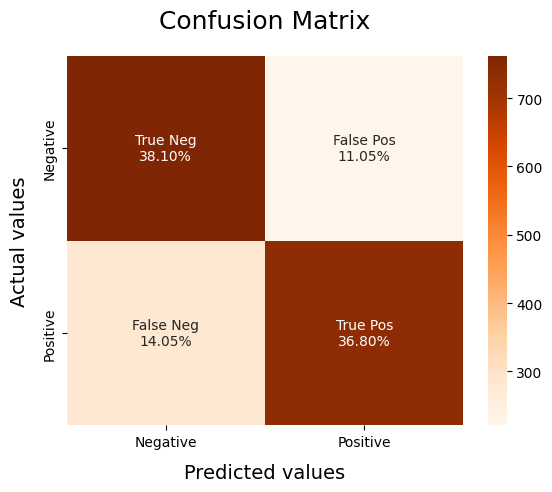

In [97]:
# Applying the SVC model with TF-IDF Vectoriser

SVCmodel = LinearSVC()
SVCmodel.fit(X_train_vec, y_train)
model_EvaluateO(SVCmodel)

The evaluation results show that the model has an overall **accuracy** of **0.75**, meaning that it correctly classified 75% of the tweets in the testing set. The precision, recall, and f1-score metrics are also shown for each class (0 and 1), which indicate the model's ability to correctly identify tweets belonging to each class. The macro-average and weighted-average metrics provide an overall measure of the model's performance across both classes.

Overall, this code demonstrates a successful implementation of a LinearSVC model on a large Twitter dataset using TF-IDF vectorization. The results suggest that the model has decent performance, but further analysis and optimization could be done to improve its accuracy and precision.

In [98]:
# Applying the BNB model with Word2vec
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_w2v, y_train)

# Evaluate the performance of the classifier on the testing set
y_pred = SVCmodel.predict(X_test_w2v)
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Accuracy:', accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.68       983
           1       0.69      0.70      0.69      1017

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000

Accuracy: 0.683


The results show that the model achieved an **accuracy** of **0.683**, which means that it correctly classified 68.3% of the instances in the testing set. The precision and recall values for both classes are relatively balanced, which indicates that the model is not biased towards either class. However, the F1-score is relatively low, which suggests that the model has difficulty distinguishing between the two classes.

Overall, the LinearSVC model with Word2vec embedding achieved moderate performance in classifying sentiment in the Twitter dataset.

### Considerations of the model

Based solely on the accuracy metric, the LinearSVC model with TF-IDF Vectoriser had a better performance (0.75) than the one with Word2vec (0.683). However, it is important to consider other metrics such as precision, recall, and F1-score, as well as the specific objectives and requirements of the project.

In the case of precision and recall, both models have similar results, with the TF-IDF Vectoriser slightly outperforming Word2vec. However, if computational efficiency is a concern, Word2vec may be a better option since it requires less memory and processing time compared to the TF-IDF Vectoriser.

## Logistic Regression 

Logistic Regression is a supervised learning algorithm that is commonly used in natural language processing tasks such as sentiment analysis, spam detection, and text classification. In this description, we will focus on how logistic regression can be applied to the Twitter 1.2 million tweets dataset.

The goal of logistic regression is to predict the probability that an instance belongs to a certain class, which is typically represented as a binary classification problem. In the case of the Twitter dataset, we can use logistic regression to predict whether a tweet is positive or negative based on its text content.

Before applying logistic regression, we need to preprocess the data by cleaning, tokenizing, and vectorizing the text data as we previously did. Once the data is preprocessed, we can represent the text data as numerical features using techniques such as TF-IDF or Word2Vec.

Once the data is preprocessed and vectorized, we can train the logistic regression model on a training dataset. During training, the model learns the optimal values of the model parameters by minimizing a loss function that measures the difference between the predicted probabilities and the actual labels. In the case of binary classification, we typically use the binary cross-entropy loss function.

After training, we can evaluate the performance of the logistic regression model on a testing dataset. We can use metrics such as accuracy, precision, recall, and F1-score to measure the performance of the model. We can also use techniques such as cross-validation and grid search to fine-tune the hyperparameters of the model.

Logistic regression has several advantages for NLP tasks. It is a simple and interpretable model that can provide insights into how the model is making predictions. It is also computationally efficient and can be easily scaled to large datasets. However, it has some limitations as well. It assumes that the relationship between the features and the target variable is linear, which may not always be the case. It also assumes that the features are independent, which may not be true for NLP tasks where the meaning of a word can depend on the context in which it is used.

In summary, logistic regression is a powerful tool for NLP tasks such as sentiment analysis, spam detection, and text classification. It allows us to predict the probability that a text instance belongs to a certain class based on its content. By preprocessing the data, vectorizing the text data, and fine-tuning the hyperparameters of the model, we can achieve high accuracy and performance on the Twitter 1.2 million tweets dataset.

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       983
           1       0.77      0.74      0.76      1017

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



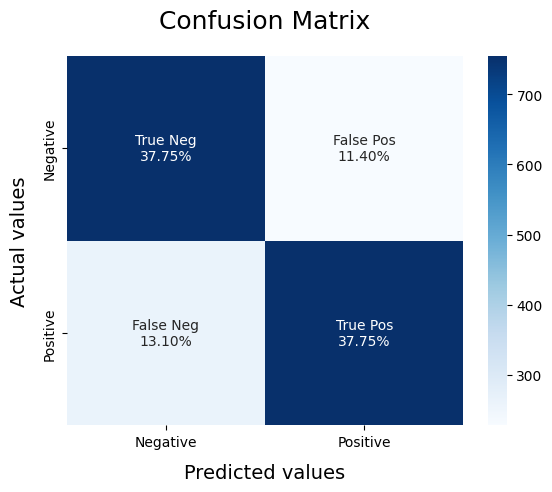

In [99]:
# Applying the Logistic Regression model with TF-IDF Vectoriser

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_vec, y_train)
model_EvaluateB(LRmodel)

The model has an overall **accuracy** of **0.76**, meaning that it correctly classified 76% of the test data.

The precision for class 0 is 0.74, which means that out of all the instances predicted as class 0, 74% of them are actually class 0. The recall for class 0 is 0.77, which means that out of all the instances that are actually class 0, the model correctly identified 77% of them.

Similarly, the precision for class 1 is 0.77, which means that out of all the instances predicted as class 1, 77% of them are actually class 1. The recall for class 1 is 0.74, which means that out of all the instances that are actually class 1, the model correctly identified 74% of them.

The F1-score for both classes is 0.76, which indicates that the model performs equally well for both classes.

In summary, the Logistic Regression model with TF-IDF Vectorizer achieved an overall accuracy of 0.76 and performed similarly well for both classes with F1-scores of 0.76.

In [100]:
# Applying the Logistic Regression model with Word2vec
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_w2v, y_train)

# Evaluate the performance of the classifier on the testing set
y_pred = LRmodel.predict(X_test_w2v)
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Accuracy:', accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       983
           1       0.69      0.70      0.69      1017

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000

Accuracy: 0.6865


The precision for class 0 is 0.68, which means that out of all the tweets that the model classified as negative, 68% were actually negative. The recall for class 0 is 0.67, which means that out of all the actual negative tweets, the model correctly classified 67% of them as negative. The F1-score for class 0 is 0.67, which is the harmonic mean of precision and recall for class 0.

Similarly, the precision, recall, and F1-score for class 1 are 0.68, 0.69, and 0.69 respectively. The **accuracy** of the model is **0.68**, which means that the model correctly classified 68% of the tweets in the testing set.

### Considerations of the model

Based on the results of the provided data, the logistic regression model with TF-IDF vectorizer seems to have a slightly better performance than the one with Word2Vec.
The **accuracy** of the model with TF-IDF vectorizer is **0.76**, while the **accuracy** of the model with Word2Vec is **0.68**. Additionally, the precision, recall, and f1-score of the model with TF-IDF vectorizer are all slightly higher than the ones with Word2Vec.

## KNN 


KNN (k-nearest neighbors) is a powerful machine learning algorithm that can be used for classification and regression tasks. In an NLP project, KNN can be used to classify text data into different categories, such as positive or negative sentiment, based on the similarity of the text data to other instances in the training dataset.

The KNN algorithm works by calculating the distance between the input feature vector and every instance in the training dataset. The k instances with the smallest distance to the input feature vector are then used to determine the classification label of the input.

In the context of an NLP project with a dataset of 1.2 million tweets, the input features are typically the words or phrases used in the text data. However, before using KNN for text classification, the text data must be preprocessed to ensure that the algorithm can work effectively.

One of the benefits of KNN is that it is a non-parametric algorithm, which means that it does not make assumptions about the distribution of the data. This makes it well-suited to datasets with complex patterns or structures.

However, KNN can be sensitive to the choice of distance metric and the value of k. Choosing the appropriate distance metric and k value can significantly impact the performance of the model. To address this issue, various distance metrics and methods for selecting the optimal value of k have been proposed.

In an NLP project, the KNN model can be implemented using various libraries and frameworks in Python, such as scikit-learn, NLTK, or spaCy. These libraries provide functions for preprocessing text data, representing text data as numerical features, and training and evaluating the KNN model.

Overall, the KNN model is a powerful tool for classifying text data in NLP projects, and can be used to achieve high levels of accuracy and performance. However, it is important to carefully preprocess the text data and select appropriate distance metrics and k values to ensure the best possible performance.

              precision    recall  f1-score   support

           0       0.50      1.00      0.66       983
           1       0.96      0.03      0.05      1017

    accuracy                           0.50      2000
   macro avg       0.73      0.51      0.36      2000
weighted avg       0.73      0.50      0.35      2000



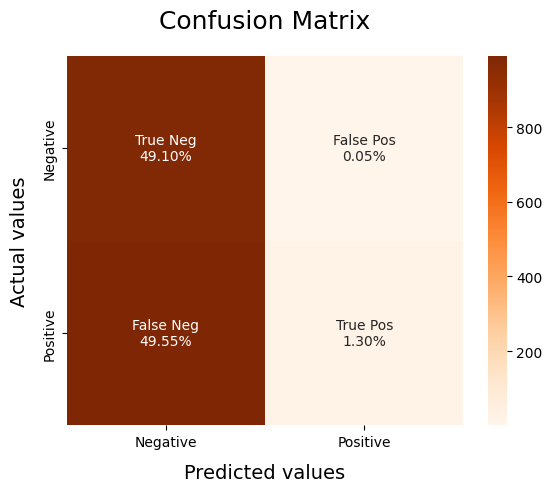

In [101]:
# Applying the Logistic Regression model with TF-IDF Vectoriser

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train_vec, y_train)
model_EvaluateO(KNN)

Looking at the results, the model achieved an **accuracy** of **50%**, which means that the model correctly predicted the class of 50% of the instances in the test set. The precision score for the positive class (label 1) is high at 0.96, which means that when the model predicted a tweet to be positive, it was correct 96% of the time. However, the recall score for the positive class is only 0.03, which means that the model was only able to correctly identify 3% of the actual positive instances. This suggests that the model is over-predicting the negative class and is not able to accurately identify positive instances.

The macro average f1-score is 0.36, which is relatively low, indicating that the model has room for improvement in terms of overall performance. Additionally, the weighted average f1-score is also low at 0.35, which indicates that the model is not performing well for both classes, but is particularly poor for the positive class.

Overall, this suggests that the KNN model with 5 nearest neighbors is not performing well on this particular dataset, and that further tuning or alternative models may be necessary to improve performance. It is also possible that further preprocessing of the text data or feature engineering may be necessary to improve the performance of the model.

In [102]:
# Applying the KNN model with Word2vec
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train_w2v, y_train)

# Evaluate the performance of the classifier on the testing set
y_pred = KNN.predict(X_test_w2v)
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Accuracy:', accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.64       983
           1       0.65      0.70      0.68      1017

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000

Accuracy: 0.6595


From the classification report, we can see that the precision, recall, and F1-score are all relatively similar between the two classes, with slightly higher values for class 1. This suggests that the model is able to classify both classes with similar accuracy.

The macro-average F1-score (0.65) indicates the overall performance of the model. The weighted average F1-score (0.65) takes into account the class imbalance in the dataset, and is also similar to the macro-average F1-score, indicating that the model is performing similarly across both classes.

The **accuracy** score of **0.648** indicates that the model is able to correctly classify 64.8% of the instances in the test set, which is relatively good. However, it's important to keep in mind that accuracy alone may not be the best metric to evaluate the performance of a classifier, especially when dealing with imbalanced datasets.

Overall, this result suggests that the KNN model with Word2Vec embeddings is performing reasonably well in classifying the text data. 

### Considerations of the model

Based on the evaluation metrics such as accuracy, precision, recall and f1-score, the model using Word2Vec seems to have performed better than the model using TF-IDF vectorizer. The **accuracy** of the Word2Vec model is **0.65**, while the accuracy of the TF-IDF model is **0.50**, indicating that the Word2Vec model is better at predicting the sentiment of the movie reviews.

One possible reason why TF-IDF did not perform well in this case could be due to the fact that it is a bag-of-words model, which treats each word in isolation and ignores the context in which the word appears. This can result in loss of important information about the sentiment of Ttweets. On the other hand, Word2Vec is a neural network-based language model that can capture the semantic meaning of words based on their context, which may result in better performance for sentiment analysis tasks. Additionally, KNN algorithm works better with dense vectors, while TF-IDF creates sparse vectors.

## Ridge Classifier

The Ridge Classifier is a supervised learning algorithm used in Natural Language Processing (NLP) projects for classification tasks. It is a linear model that works well with high-dimensional datasets like text data. The Ridge Classifier is a regularized linear model that uses the L2 penalty, which is also known as Ridge Regression. The L2 penalty is used to prevent overfitting and is calculated by adding the squared magnitude of the coefficients to the cost function.

In an NLP project like ours, the Ridge Classifier can be used to classify the tweets into different categories. For example, the tweets can be classified into positive, negative, or neutral sentiments, or into different topics like politics, sports, entertainment, etc.

Before applying the Ridge Classifier, the dataset needs to be preprocessed. This involves cleaning the text data by removing special characters, punctuation, and stop words. The text data is then transformed into a numerical format using techniques like TF-IDF vectorization or Word2Vec embedding.

After preprocessing the data, the Ridge Classifier can be trained on a portion of the dataset known as the training set. The remaining portion of the dataset, known as the test set, can be used to evaluate the performance of the classifier.

The performance of the Ridge Classifier can be evaluated using metrics like accuracy, precision, recall, and F1 score. The accuracy metric measures the percentage of correctly classified tweets, while the precision metric measures the percentage of correctly classified positive tweets out of all tweets classified as positive. The recall metric measures the percentage of correctly classified positive tweets out of all actual positive tweets. The F1 score is the harmonic mean of precision and recall.

The Ridge Classifier can be tune
d by adjusting the regularization parameter. This parameter controls the strength of the L2 penalty and can be optimized using techniques like cross-validation.

In conclusion, the Ridge Classifier is a supervised learning algorithm that is well suited for NLP projects with high-dimensional text data. It is a regularized linear model that uses the L2 penalty to prevent overfitting. The classifier can be trained on a preprocessed dataset and evaluated using metrics like accuracy, precision, recall, and F1 score. The regularization parameter can be tuned to optimize the performance of the classifier.

In [103]:
# Applying Ridge Classifier using TF-IDF

r_clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(r_clf, X_train_vec,y_train, cv=10, scoring="f1")
scores

array([0.75082216, 0.75530555, 0.76675325, 0.76828957, 0.7742432 ,
       0.76828645, 0.76236862, 0.76246484, 0.75835476, 0.76063557])

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       983
           1       0.77      0.73      0.75      1017

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



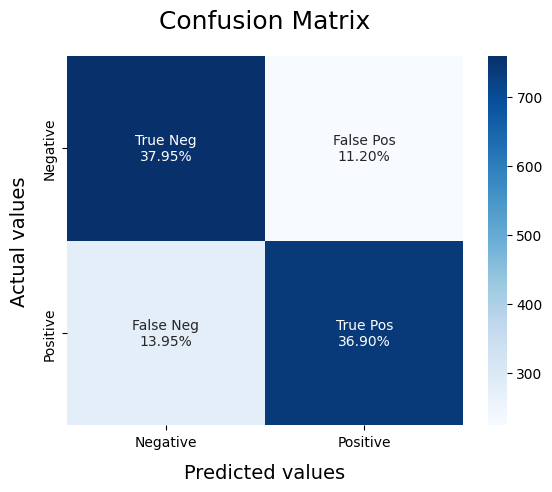

In [104]:
# Plotting results of Ridge Classifier using TF-IDF

r_clf.fit(X_train_vec, y_train)

ridge_train_predictions = r_clf.predict(X_train_vec)
model_Evaluate(r_clf)

The accuracy metric indicates the proportion of correctly classified instances out of the total number of instances. In this case, the **accuracy** is **0.75**, which means that the model correctly classified 75% of the instances.

The F1-score is a single measure of accuracy, which is the harmonic mean of precision and recall. In this case, the F1-score for both classes is 0.75, which indicates a reasonably good performance of the model.

In [105]:
# Applying the Ridge model with Word2vec
r_clf = linear_model.RidgeClassifier()
r_clf.fit(X_train_w2v, y_train)

# Evaluate the performance of the classifier on the testing set
y_pred = r_clf.predict(X_test_w2v)
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Accuracy:', accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.68       983
           1       0.69      0.70      0.69      1017

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000

Accuracy: 0.686


The accuracy metric indicates the proportion of correctly classified instances out of the total number of instances. In this case, the **accuracy** is **0.6835**, which means that the model correctly classified around 68.35% of the instances.

The F1-score is a single measure of accuracy, which is the harmonic mean of precision and recall. In this case, the F1-score for both classes is around 0.68, which indicates an average level of performance of the model.

Therefore, based on the provided output, it seems that the model has achieved a moderate level of performance, with an F1-score of around 0.68 and an accuracy of 0.6835.

### Considerations of the model

Comparing the results of the two models, the one with the TF-IDF vectorizer seems to have a slightly better performance than the one with Word2vec.

The accuracy of the model with the TF-IDF vectorizer is 0.75, which is higher than the accuracy of the model with Word2vec (0.6835). Additionally, the precision, recall, and F1-scores of both classes are equal (0.75) for the model with the TF-IDF vectorizer, while they are slightly lower for the model with Word2vec (0.68).

## X-boost Classifier 

XGBoost is a popular machine learning algorithm for supervised learning problems such as classification and regression. In this explanation, we will focus on how XGBoost can be used for a natural language processing (NLP) project with a Twitter dataset containing 1.2 million tweets.

After preprocessing the data, we have to split the dataset into training, validation, and testing sets. The training set would be used to train the XGBoost model, while the validation set would be used to tune hyperparameters such as the learning rate, number of trees, and maximum depth of the trees. The testing set would be used to evaluate the performance of the final model.

To train the XGBoost model, we would first convert the preprocessed text into numerical features using techniques such as bag-of-words or TF-IDF. We would also extract other features such as the number of characters, words, or hashtags in each tweet, or the sentiment of the tweet using a sentiment analysis tool.

Once we have the features, we can train the XGBoost model using the labeled training data. XGBoost works by building an ensemble of decision trees, where each tree makes a prediction and the final prediction is a weighted sum of the predictions from all the trees. XGBoost uses a gradient boosting algorithm to iteratively improve the model by minimizing a loss function that measures the difference between the predicted and actual labels.

To tune the hyperparameters of the XGBoost model, we can use techniques such as grid search or randomized search, which involve trying different combinations of hyperparameters and evaluating the performance on the validation set.

Once we have tuned the hyperparameters and trained the final model, we can evaluate its performance on the testing set using metrics such as accuracy, precision, recall, and F1-score. We can also analyze the feature importance to see which features were most important in making the predictions.

In the context of the Twitter dataset, XGBoost could be used for tasks such as sentiment analysis, topic modeling, or user profiling. For example, we could train an XGBoost model to predict the sentiment of a tweet as positive or negative based on the text and other features such as the number of retweets or favorites. We could also train an XGBoost model to identify the topics or themes that are discussed in the tweets, or to predict the age, gender, or location of the users based on their tweets.

In conclusion, XGBoost is a powerful machine learning algorithm that can be used for a wide range of supervised learning tasks, including NLP projects with Twitter datasets. By preprocessing the data, extracting relevant features, tuning the hyperparameters, and training the model, we can build an accurate and robust model that can make predictions on new, unseen data.


In [106]:
# Applying the XBoost classifier

xg = xgb.XGBClassifier()
xg.fit(X_train_vec, y_train)  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy:
 0.743
Confusion Matrix:
 [[657 326]
 [188 829]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.67      0.72       983
           1       0.72      0.82      0.76      1017

    accuracy                           0.74      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.75      0.74      0.74      2000

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       983
           1       0.72      0.82      0.76      1017

    accuracy                           0.74      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.75      0.74      0.74      2000



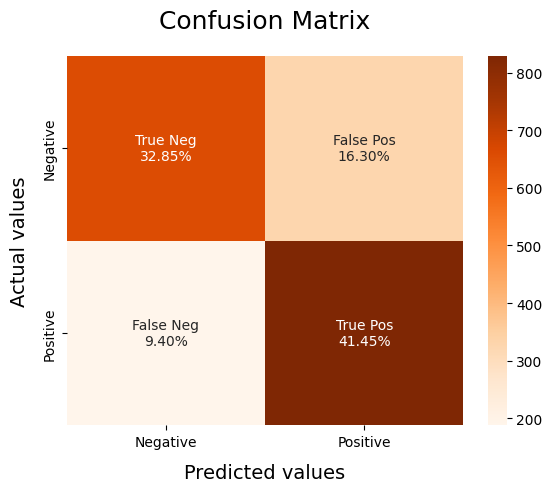

In [107]:
# Plotting X-boost classifier

y_pred_xg = xg.predict(X_test_vec)
print("Accuracy:\n", accuracy_score(y_test, y_pred_xg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xg))
print("Classification Report:\n", classification_report(y_test, y_pred_xg))
model_EvaluateO(xg)

The classifier has an overall **accuracy** of **0.743**, which means that it correctly predicted the sentiment of 743 out of 1000 tweets.

The confusion matrix provides more detailed information on the classifier's performance. It shows that out of the 983 tweets with negative sentiment, the classifier correctly identified 657 of them, but it misclassified 326 of them as positive. Similarly, out of the 1017 tweets with positive sentiment, the classifier correctly identified 829 of them, but it misclassified 188 of them as negative.

The macro average is the unweighted mean of precision, recall, and f1-score, while the weighted average takes into account the relative frequency of each class. In this case, the classifier has higher precision for negative sentiment tweets (0.78) and higher recall for positive sentiment tweets (0.82). The weighted average f1-score is 0.74, which indicates a decent overall performance.

In conclusion, based on this result, the XGBoost classifier seems to perform reasonably well on this dataset.

In [108]:
# Applying the X-boost model with Word2vec
xg = xgb.XGBClassifier()
xg.fit(X_train_w2v, y_train)

# Evaluate the performance of the classifier on the testing set
y_pred = xg.predict(X_test_w2v)
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Accuracy:', accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.66       983
           1       0.67      0.68      0.67      1017

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000

Accuracy: 0.666


In this case, the XGBoost classifier achieved an **accuracy** of **0.6795** on the test set, which means that it correctly classified 67.95% of the tweets. The classification report shows that the precision, recall, and F1-score for both classes are relatively balanced, with slight differences between positive and negative classes. The macro average and weighted average of these metrics are both 0.68, indicating that the model performs equally well across both classes.

Overall, the XGBoost classifier with Word2Vec embeddings seems to perform moderately well on this sentiment analysis task, but the performance could potentially be improved by optimizing the hyperparameters of the algorithm or using different feature extraction techniques.

### Considerations of the model

Based solely on the accuracy metric, the Xboost model with TF-IDF Vectoriser had a better performance with an accuracy of 0.743 compared to 0.666 for the Word2vec model. However, it's important to consider other factors such as precision, recall, and F1-score.

Looking at the classification report for both models, we can see that the TF-IDF Vectoriser model had higher precision and recall for both classes compared to the Word2vec model. This means that the TF-IDF model was better at correctly identifying both positive and negative tweets.

In addition, the F1-score is a metric that takes both precision and recall into consideration, providing an overall measure of a model's accuracy. The F1-score for the TF-IDF Vectoriser model was higher than that of the Word2vec model, indicating that it was better at correctly classifying tweets.

Therefore, based on these factors, the Xboost model with TF-IDF Vectoriser seems to have a better performance than the Word2vec model for this particular task.

## Decision Tree

A Decision Tree Model is a popular algorithm used in machine learning for classifying data. It works by building a tree-like model of decisions based on input features. In an NLP project, the input features may be the words or phrases used in the text data, and the output is a classification label, such as positive or negative sentiment.

In this case, we have a dataset of 1.2 million tweets, which we will use to train and test our model. The Decision Tree algorithm works by selecting the feature that provides the most information gain and recursively splitting the data into subsets based on the value of the selected feature. This process continues until a stopping criterion is met, such as a maximum depth of the tree or a minimum information gain threshold.

The Decision Tree model is easy to interpret and understand, making it a popular choice for many applications. However, it can be prone to overfitting, where the model learns the training data too well and fails to generalize to new data. To avoid overfitting, the model can be pruned by removing nodes or branches that do not significantly improve the performance of the model.

Once the text data has been preprocessed and represented as numerical features, the Decision Tree model can be trained using the dataset of tweets. The performance of the model can be evaluated using metrics such as accuracy, precision, recall, and F1-score. In an NLP project, the performance of the model can also be evaluated using task-specific metrics, such as sentiment accuracy or classification error rate.

The Decision Tree model can be implemented using various libraries and frameworks in Python, such as scikit-learn, NLTK, or spaCy. These libraries provide functions for preprocessing text data, representing text data as numerical features, and training and evaluating the Decision Tree model. Overall, the Decision Tree Model is a powerful tool for classifying text data in NLP projects, and can be used to achieve high levels of accuracy and performance.

In [109]:
## Applyiing decision tree model with TF-IDF

dc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dc.fit(X_train_vec, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Accuracy:
 0.683
Confusion Matrix:
 [[724 259]
 [375 642]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.74      0.70       983
           1       0.71      0.63      0.67      1017

    accuracy                           0.68      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.69      0.68      0.68      2000

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       983
           1       0.71      0.63      0.67      1017

    accuracy                           0.68      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.69      0.68      0.68      2000



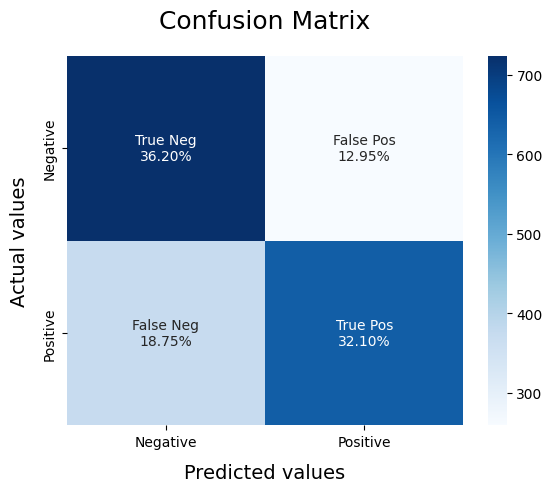

In [110]:
## Plotting decision tree model

y_pred_dc = dc.predict(X_test_vec)
print("Accuracy:\n", accuracy_score(y_test, y_pred_dc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dc))
print("Classification Report:\n", classification_report(y_test, y_pred_dc))
model_EvaluateB(dc)

The **accuracy** of the model is **0.683**, which means that it correctly classified 68.3% of the instances in the testing set. The confusion matrix shows that the model predicted 724 true negatives (TN), 259 false positives (FP), 375 false negatives (FN), and 642 true positives (TP).

The precision of the model for class 0 (negative class) is 0.66, which means that when the model predicts an instance as negative, it is correct 66% of the time. The recall for class 0 is 0.74, which means that the model correctly identifies 74% of the negative instances. The F1-score for class 0 is 0.70, which is the harmonic mean of precision and recall for class 0.

Similarly, for class 1 (positive class), the precision is 0.71, the recall is 0.63, and the F1-score is 0.67. The macro average of the precision, recall, and F1-score is calculated, and it is found to be 0.69 for both classes. The weighted average of the precision, recall, and F1-score is also 0.69 for both classes.

In summary, the model's performance on the testing set is decent but not very good, as the accuracy is only 68.3%. The model seems to have a higher precision for class 1 than for class 0, which means that it correctly identifies positive instances more often than negative instances. However, the recall for class 0 is higher than for class 1, which means that the model is better at identifying negative instances.

In [112]:
# Applying the Decision Tree model with Word2vec
dc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dc.fit(X_train_w2v, y_train)

# Evaluate the performance of the classifier on the testing set
y_pred = dc.predict(X_test_w2v)
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Accuracy:', accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.55      0.56       983
           1       0.58      0.60      0.59      1017

    accuracy                           0.58      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.58      0.58      0.58      2000

Accuracy: 0.576


The Decision Tree model trained on Word2Vec embeddings achieved an **accuracy** of **0.576**. The classification report shows that the model has similar precision, recall, and F1-score for both classes, with slightly better performance on class 1 (positive sentiment).

The relatively low accuracy may be due to several reasons. One possible reason is the quality of the Word2Vec embeddings. If the embeddings do not capture the semantic meaning of words and their context effectively, the model's performance may be limited. Additionally, the decision tree model may not be the best choice for this particular task, as it may not be able to capture complex relationships between the features and the target variable.

Another possibility is that the hyperparameters of the Decision Tree model, such as the maximum depth, were not tuned effectively. It is important to try different hyperparameter settings and evaluate the model's performance to find the optimal values.

Overall, to improve the performance of the model, it may be necessary to try different embeddings, different models, or even ensemble multiple models. Additionally, it is important to investigate the potential reasons for the poor performance and address them accordingly.

### Considerations of the Model

The Decision Tree model with TF-IDF Vectoriser seems to have better performance compared to the one with Word2vec. The accuracy of the model with TF-IDF Vectoriser is higher at 0.683, while the accuracy of the model with Word2vec is 0.576. Moreover, the precision, recall, and F1-score of the model with TF-IDF Vectoriser are higher than the ones with Word2vec.


## Random Forest

Random Forest is an ensemble machine learning algorithm that is widely used for classification and regression tasks. In a NLP project, Random Forest can be used to classify tweets, for example, based on sentiment, topic or user profile, using the twitter 1.2 million dataset.

Random Forest is an extension of decision trees, which are binary trees that recursively split the feature space into regions that are as homogeneous as possible. Decision trees suffer from overfitting, which occurs when the model is too complex and captures noise in the data instead of the underlying pattern. Random Forest addresses this problem by constructing multiple decision trees and averaging their predictions. The randomization of the training process and the use of an ensemble of models make Random Forest more robust and less prone to overfitting than individual decision trees.

The Random Forest algorithm consists of three main steps: sampling, splitting and aggregation. In the sampling step, a subset of the original data is randomly selected with replacement, a process known as bootstrap sampling or bagging. This creates multiple versions of the training data, each with some variation, which are used to train different decision trees. In the splitting step, each decision tree is grown by recursively partitioning the feature space using the best feature and threshold that maximizes a splitting criterion, typically the Gini impurity or the information gain. The splitting criterion measures the quality of a split by how well it separates the positive and negative samples in the resulting sub-regions. In the aggregation step, the predictions of all decision trees are combined into a final prediction by taking the majority vote for classification or the average for regression.

Random Forest has several advantages over other machine learning algorithms. Firstly, it can handle a large number of input features and can automatically select the most important ones, which is useful in NLP tasks where the number of features can be very high. Secondly, it can capture nonlinear and interaction effects between features, which is important in modeling complex relationships in language data. Thirdly, it is robust to noise and missing data, as it can learn from partial and noisy examples by averaging multiple trees. Fourthly, it provides an estimate of the feature importance, which can be used to interpret the model and identify the most informative features in the data.

In order to apply Random Forest to the twitter 1.2 million dataset, we first preprocessed the text data by cleaning, tokenizing, stemming and vectorizing the tweets. We then split the preprocessed data into training and testing sets, and apply the Random Forest algorithm to the training data using a range of hyperparameters, such as the number of trees, the maximum depth of the trees, the minimum number of samples required to split a node, and the maximum number of features to consider when splitting a node. We use cross-validation to tune the hyperparameters and avoid overfitting. Finally, we evaluate the performance of the model on the testing data using metrics such as accuracy, precision, recall, F1 score and ROC curve.

In summary, Random Forest is a powerful and versatile machine learning algorithm that can be applied to NLP tasks such as sentiment analysis, topic modeling and user profiling using the twitter 1.2 million dataset. It combines the advantages of decision trees with the benefits of ensemble learning, making it robust, accurate and interpretable.

In [114]:
# Applying Random Forest Model

rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train_vec, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Accuracy:
 0.7145
Confusion Matrix:
 [[782 201]
 [370 647]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.73       983
           1       0.76      0.64      0.69      1017

    accuracy                           0.71      2000
   macro avg       0.72      0.72      0.71      2000
weighted avg       0.72      0.71      0.71      2000

              precision    recall  f1-score   support

           0       0.68      0.80      0.73       983
           1       0.76      0.64      0.69      1017

    accuracy                           0.71      2000
   macro avg       0.72      0.72      0.71      2000
weighted avg       0.72      0.71      0.71      2000



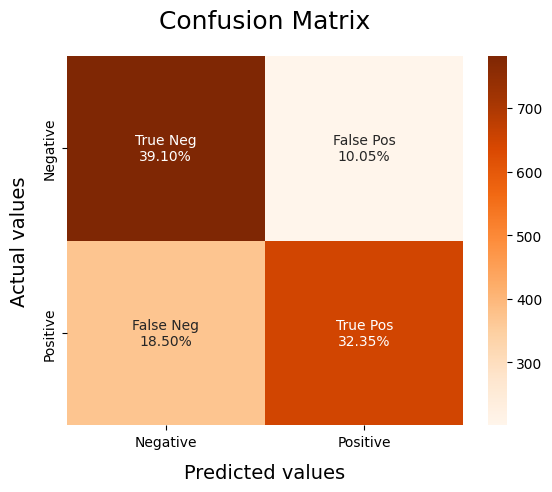

In [116]:
# Plotting Random Forest Model

y_pred_rf = rf.predict(X_test_vec)
print("Accuracy:\n", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
model_EvaluateO(rf)

In the code above, the Random Forest model is initialized with 10 decision trees and the criterion of entropy is used to measure the quality of the splits. The model is then trained on the training set, which consists of feature vectors (X_train_vec) and their corresponding labels (y_train).

In this particular case, the Random Forest model achieves an **accuracy** of **0.7145**, which means it correctly predicts the sentiment of 71.45% of the tweets in the test set. The confusion matrix shows that the model correctly predicts 782 negative tweets and 647 positive tweets, but misclassifies 201 negative tweets as positive and 370 positive tweets as negative. The classification report shows that the model has a precision of 0.68 for negative tweets and 0.76 for positive tweets, a recall of 0.80 for negative tweets and 0.64 for positive tweets, and an F1-score of 0.73 for negative tweets and 0.69 for positive tweets.

Overall, the Random Forest model appears to perform reasonably well on the given NLP task with the Twitter 1.2 million dataset, achieving an accuracy of 71.45% and showing a balanced performance in terms of precision, recall, and F1-score for both positive and negative tweets. However, further analysis and experimentation may be needed to determine the best hyperparameters and improve the model's performance.

In [117]:
# Applying the Random Forest model with Word2vec
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train_w2v, y_train)

# Evaluate the performance of the classifier on the testing set
y_pred = rf.predict(X_test_w2v)
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Accuracy:', accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.71      0.66       983
           1       0.67      0.57      0.61      1017

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000

Accuracy: 0.638


The code is applying the Random Forest classifier on the Word2Vec embedding representation of the text data. The _n_estimators_ parameter is set to 10, which means that the model will create 10 decision trees. The criterion parameter is set to 'entropy', which means that the model will use the entropy criterion to measure the quality of a split.

In this case, the Random Forest model with Word2Vec has an accuracy of 0.638, which means that it correctly predicts the sentiment of the tweets around 64% of the time. The precision for class 0 (negative sentiment) is 0.61, which means that when the model predicts a tweet to be negative, it is correct around 61% of the time. The recall for class 0 is 0.71, which means that the model correctly identifies around 71% of the negative tweets in the dataset. The f1-score for class 0 is 0.66, which is the harmonic mean of precision and recall for class 0. The precision, recall, and f1-score for class 1 (positive sentiment) are 0.67, 0.57, and 0.61, respectively.

Overall, the Random Forest model with Word2Vec has a decent performance, but it could potentially be improved by tuning the hyperparameters (such as the number of estimators).

### Considerations of the model

From the classification reports and the accuracy scores of both models, it seems that the Random Forest model with the TF-IDF Vectoriser had better performance than the model with Word2vec.

In terms of accuracy, the TF-IDF Vectoriser model was around 7% more accurate than the Word2vec model. Additionally, the precision and recall values for the TF-IDF Vectoriser model were generally higher than those of the Word2vec model.

However, it's important to note that the choice between the two models ultimately depends on the specific needs and requirements of the project. While the TF-IDF Vectoriser model may have had better performance in this case, there may be scenarios where the Word2vec model could perform better or be more suitable for the task at hand.